In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file = "dataset_mood_smartphone.csv"
dataset = pd.read_csv(file)


## Data exploration

In [20]:
dataset.info()
#dataset.describe()
#dataset['variable'].value_counts()
#dataset['id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


## PLOT mood histograms

<Figure size 1400x600 with 0 Axes>

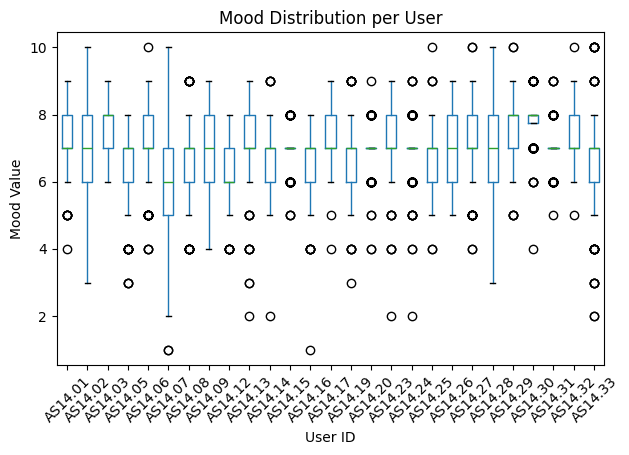

In [19]:
mood_df = dataset[dataset['variable'] == 'mood'].copy()
mood_df = mood_df.dropna(subset=['value'])

# Boxplot of mood values per user
plt.figure(figsize=(14, 6))
mood_df.boxplot(column='value', by='id', grid=False)
plt.title("Mood Distribution per User")
plt.suptitle("")  # Remove default title
plt.xlabel("User ID")
plt.ylabel("Mood Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PLOT variable histograms

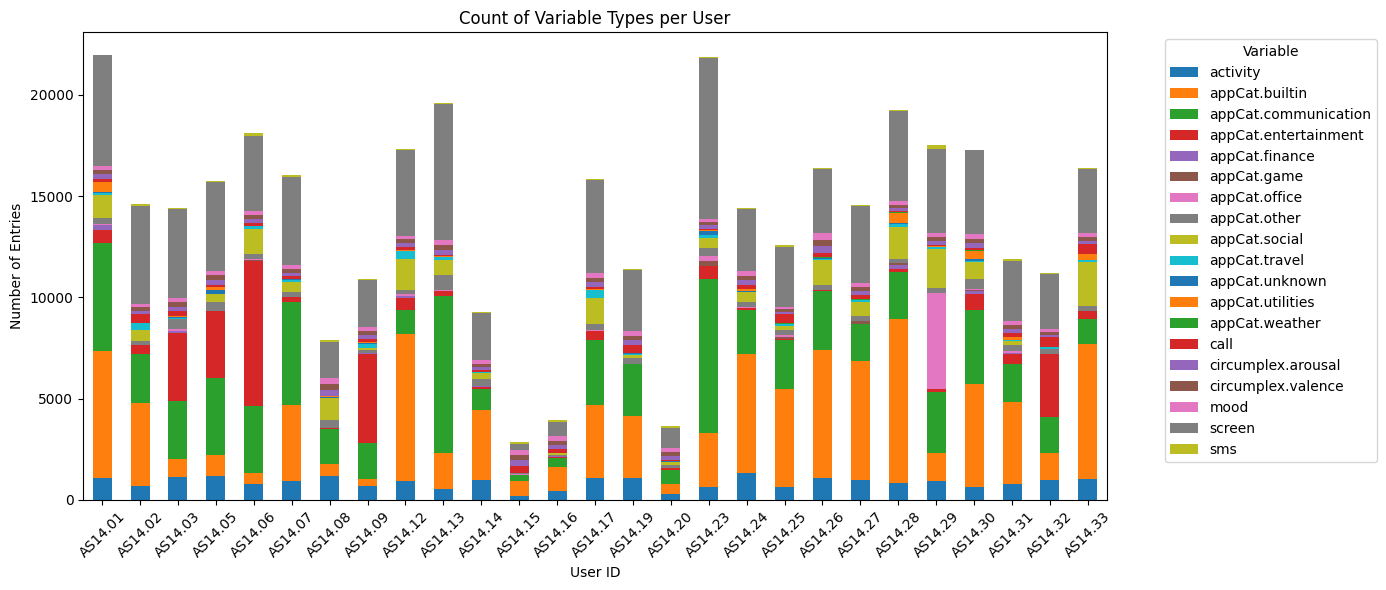

In [ ]:
df = dataset.dropna(subset=['time', 'value'])

counts = df.groupby(['id', 'variable']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Count of Variable Types per User")
plt.xlabel("User ID")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

## PLOT mean mood per hour

In [9]:
mood_vec = dataset[dataset['variable'] == 'mood'].copy()
mood_vec = mood_vec.dropna(subset=['value'])

time_vec = []
value_vec = []
for i in range(len(mood_vec)):
    time_vec.append(mood_vec['time'][i][11:16])
    value_vec.append(mood_vec['value'][i])

df = pd.DataFrame({
    'time': time_vec,
    'value': value_vec
})

mean_by_time = df.groupby('time')['value'].mean()
std_by_time = df.groupby('time')['value'].std()


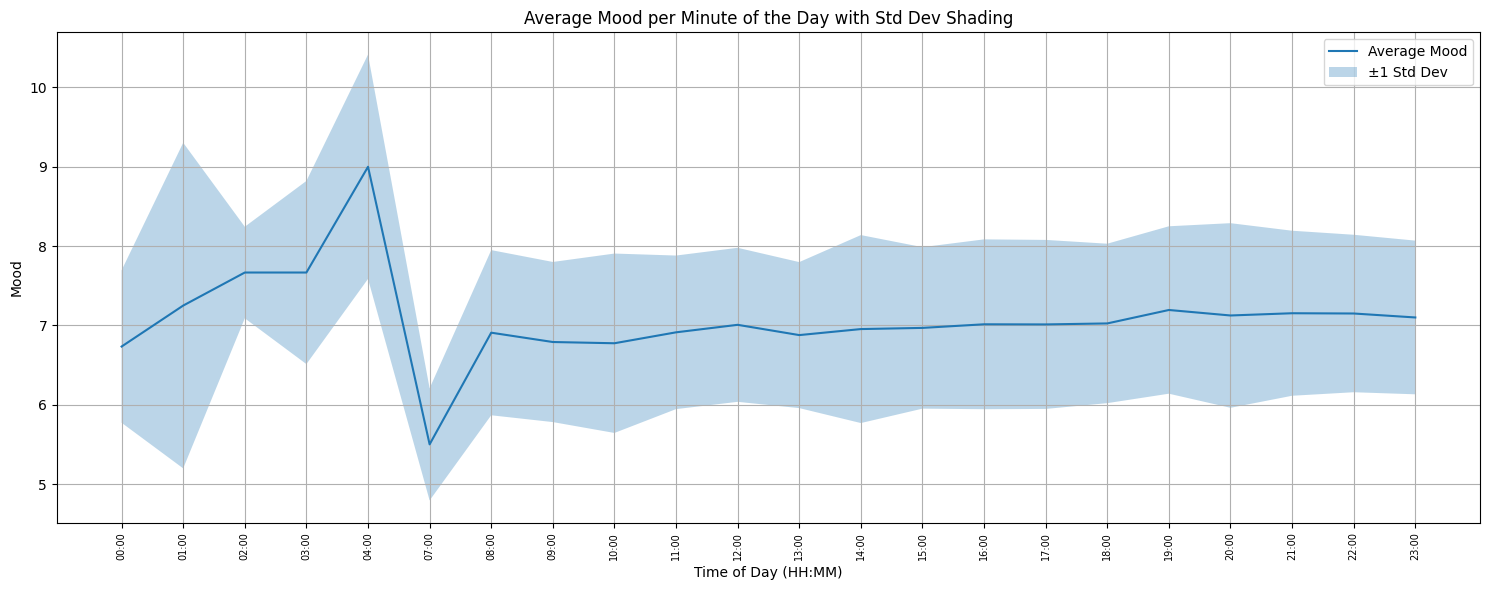

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(mean_by_time.index, mean_by_time, label='Average Mood')
plt.fill_between(
    mean_by_time.index,
    mean_by_time - std_by_time,
    mean_by_time + std_by_time,
    alpha=0.3,
    label='±1 Std Dev'
)
plt.title("Average Mood per Minute of the Day with Std Dev Shading")
plt.xlabel("Time of Day (HH:MM)")
plt.ylabel("Mood")
plt.xticks(rotation=90, fontsize=7)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()